# ML4VA Music Recommendation System

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

songs = pd.read_csv("spotify_songs.csv")

In [5]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


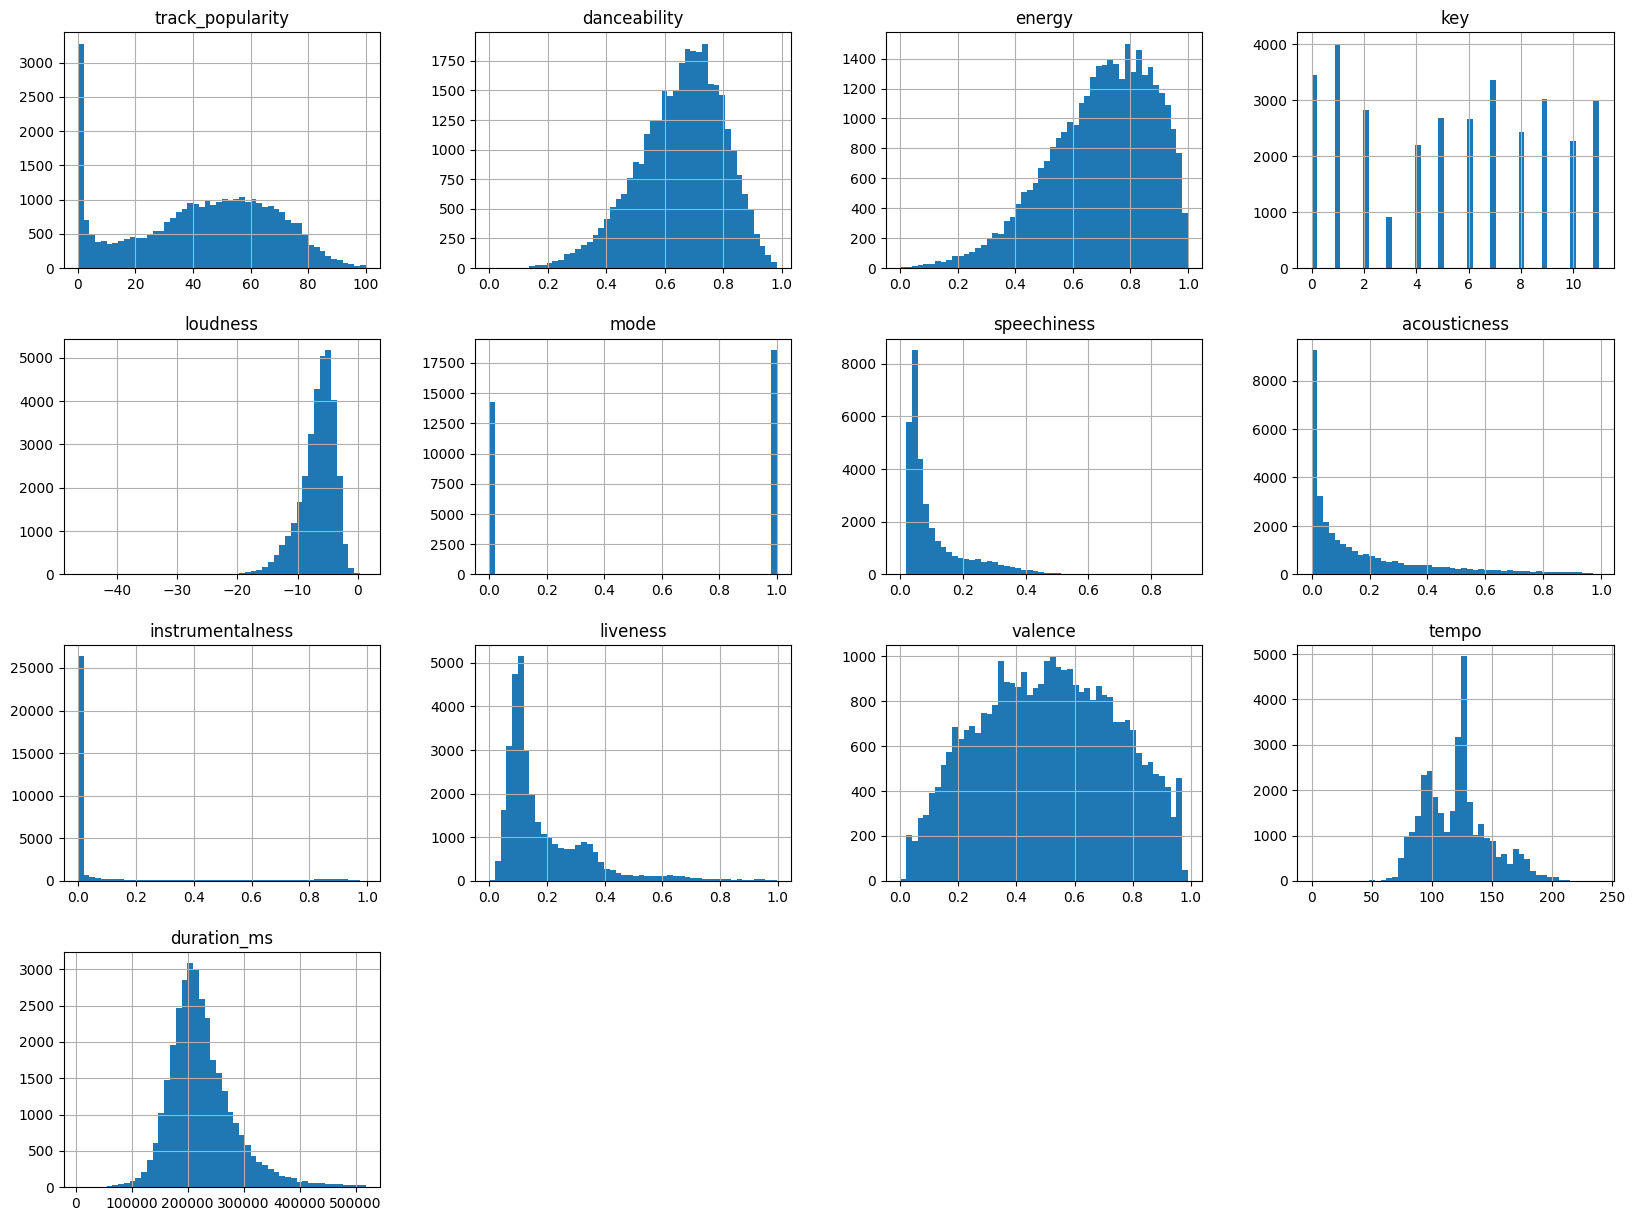

In [7]:
songs.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
songs.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


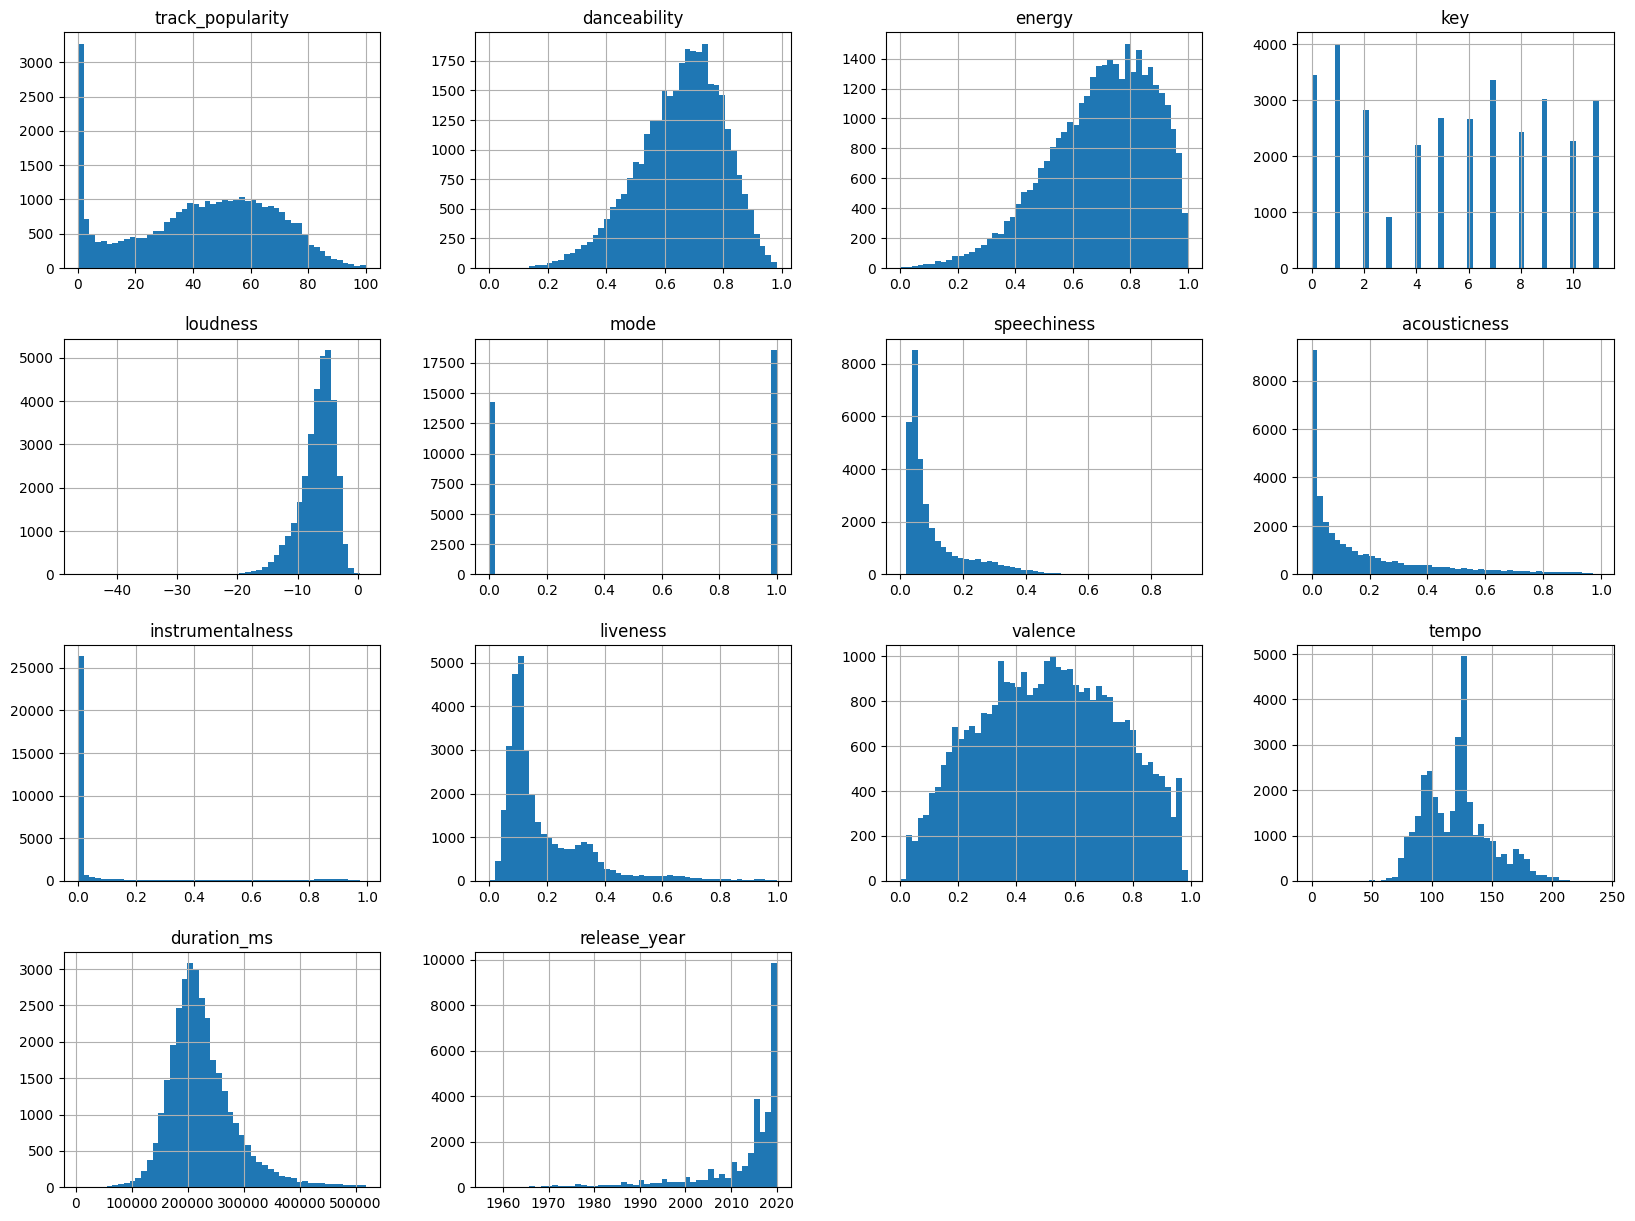

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   32828 non-null  int64  
 1   playlist_genre     32828 non-null  object 
 2   playlist_subgenre  32828 non-null  object 
 3   danceability       32828 non-null  float64
 4   energy             32828 non-null  float64
 5   key                32828 non-null  int64  
 6   loudness           32828 non-null  float64
 7   mode               32828 non-null  int64  
 8   speechiness        32828 non-null  float64
 9   acousticness       32828 non-null  float64
 10  instrumentalness   32828 non-null  float64
 11  liveness           32828 non-null  float64
 12  valence            32828 non-null  float64
 13  tempo              32828 non-null  float64
 14  duration_ms        32828 non-null  int64  
 15  release_year       30942 non-null  float64
dtypes: float64(10), int64(4), o

In [9]:
#begin to clean data
#drop songs with null values
plt.show()
songs=songs.dropna()
# songs.info()

#scale
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
songsKeep = songs
songs['track_album_release_date'] = pd.to_datetime(songs['track_album_release_date'], errors='coerce')
songs['release_year'] = songs['track_album_release_date'].dt.year
songs.drop('track_album_release_date', axis=1, inplace=True)
columns_to_keep = ['playlist_genre', 'playlist_subgenre']
songs = songs.drop(columns=[col for col in songs.select_dtypes(include=['object']).columns if col not in columns_to_keep])
songs.hist(bins=50, figsize=(20,15))
plt.show()
songs.info()

num_columns = songs.select_dtypes(include=['float64', 'int64']).columns
cat_columns = songs.select_dtypes(include=['object']).columns

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_columns),

    ('cat', cat_pipeline, cat_columns)
])
songs_prepared = full_pipeline.fit_transform(songs)




In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# inertia = []
# K_range = range(1, 100)

# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(songs_prepared)
#     inertia.append(kmeans.inertia_)

# plt.plot(K_range, inertia, marker='o')
# plt.title('Elbow Method For Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia')
# plt.show()

#elbow point of 20
kmeans = KMeans(n_clusters=200, n_init='auto', random_state=1)
kmeans.fit(songs_prepared)
clusters = kmeans.predict(songs_prepared)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(songs_prepared, clusters)

0.06510241045689275

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
def find_closest_song(song_name, songs, songs_prepared, kmeans):
    song_index = songs[songs['track_name'] == song_name].index[0]
    song_cluster = kmeans.predict(songs_prepared[song_index].reshape(1, -1))[0]
    cluster_indices = np.where(kmeans.labels_ == song_cluster)[0]
    cluster_indices = cluster_indices[cluster_indices != song_index]
    distances = pairwise_distances_argmin_min(songs_prepared[song_index].reshape(1, -1), songs_prepared[cluster_indices])[1]
    closest_song_index = cluster_indices[distances.argmin()]
    return songs.iloc[closest_song_index]
# print(songs.columns)
print(find_closest_song('Big Drip', songsKeep, songs_prepared, kmeans))


def recommendSong(songId):
    # get the index of the song ID
    song_index = songsKeep[songsKeep['id'] == songId].values[0]

    query_song_features = songs_prepared[song_index].reshape(1, -1)

    # Find the k nearest neighbours of the queried song
    distances, indices = model.kneighbors(query_song_features)

    # Get recommended song IDs
    recommended_song_ids = song_ids.iloc[indices[0]].values.tolist()

    # Get the names of the recommended songs
    recommendations = allFeaturedDataset[allFeaturedDataset['id'].isin(recommended_song_ids)][['name', 'artists']]

    # sort the dataframe by distance
    recommendations = recommendations.sort_values(by='distance', ascending=True)
    # return the dataframe
    return recommendations



track_id                   3yNZ5r3LKfdmjoS3gkhUCT
track_name           bad guy (with Justin Bieber)
track_artist                        Billie Eilish
track_popularity                               83
track_album_id             6lMlX68jJrx67hiCqdiDvW
track_album_name     bad guy (with Justin Bieber)
playlist_name                           Pop Remix
playlist_id                37i9dQZF1DXcZDD7cfEKhW
playlist_genre                                pop
playlist_subgenre                       dance pop
danceability                                 0.67
energy                                      0.453
key                                             0
loudness                                  -11.265
mode                                            1
speechiness                                 0.295
acousticness                                0.252
instrumentalness                             0.33
liveness                                    0.117
valence                                      0.68
